## Insights from T20 World Cup 2022 (Project)

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
df_match=pd.read_csv(r"C:\Users\LENOVO\Desktop\Data Science\dim_match_summary.csv")
df_match.head()

,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


**Now will see that what to choose batting or fielding on a particular ground**

In [4]:
df_match.ground.value_counts()

Hobart       9
Sydney       7
Melbourne    7
Adelaide     7
Geelong      6
Perth        5
Brisbane     4
Name: ground, dtype: int64

**Batting first team has won the most matches on Hobart ground**

In [5]:
playing_on_hobart = df_match.apply(lambda x: 1 if x['team1'] == x['winner'] and x['ground'] == 'Hobart' else 0 , axis=1).sum()
playing_on_hobart

5

**Chasing team has won the most match on Perth ground**

In [7]:
playing_on_Perth = df_match.apply(lambda x: 1 if x['team2']== x['winner'] and x['ground'] == "Perth" else 0 ,axis =1).sum()
playing_on_Perth

4

In [8]:
Match_winner = df_match[(df_match.winner != 'no result') & (df_match.winner != 'abandoned')].winner.value_counts()

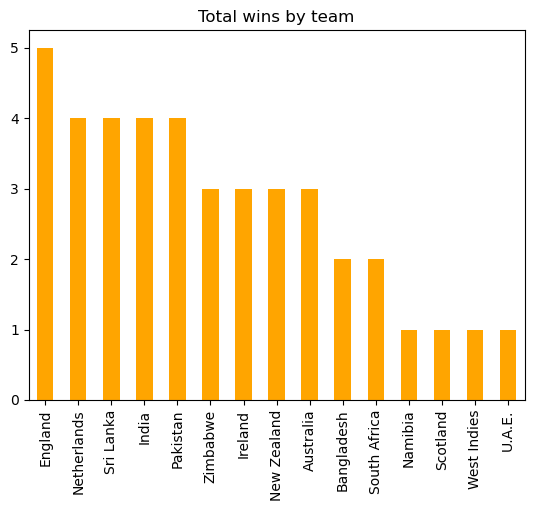

In [9]:
ax = Match_winner.plot(x='winner',y='count',kind='bar',color='orange')
ax.set_title('Total wins by team')
plt.show()

**Batting Summary**

In [9]:
batting=pd.read_csv(r"C:\Users\LENOVO\Desktop\Data Science\batting_summary.csv")
batting.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823


**Top 5 run scorer in the tournament**

In [77]:
Top_5 = batting.groupby('batsmanName')['runs'].sum().sort_values(ascending=False).head()

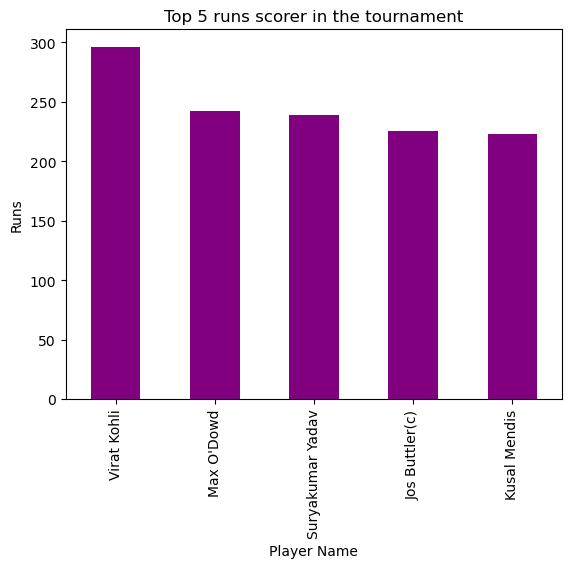

In [107]:
Top_5.plot(kind='bar',color='purple')
plt.title("Top 5 runs scorer in the tournament")
plt.ylabel("Runs")
plt.xlabel("Player Name")
plt.show()

**Top 5 Middle order batsman**

In [113]:
Top_5_mid_order=batting[(batting.battingPos >= 4) & (batting.battingPos <=6)].groupby('batsmanName').runs.sum().sort_values(ascending=False).head()

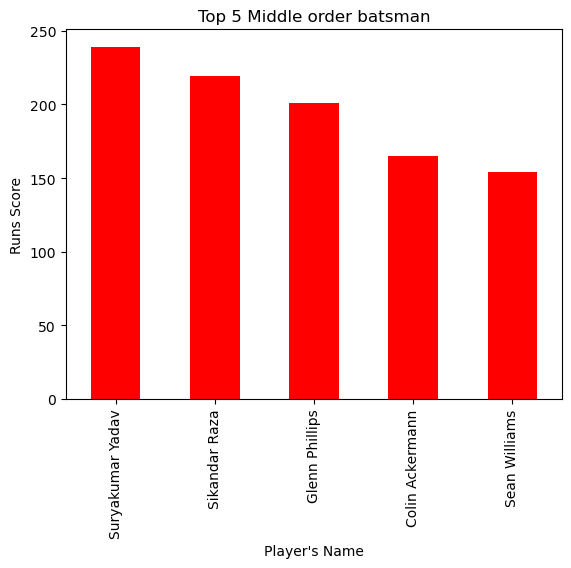

In [114]:
Top_5_mid_order.plot(kind='bar',color='red')
plt.title("Top 5 Middle order batsman")
plt.ylabel("Runs Score")
plt.xlabel("Player's Name")
plt.show()

**Total Sixes in tournament**

In [12]:
batting.agg({'6s':sum , '4s':sum})

6s    331
4s    909
dtype: int64

In [19]:
batting.groupby('batsmanName').agg({'6s':sum}).sort_values('6s',ascending = False).head()

,6s
batsmanName,
Sikandar Raza,11
Kusal Mendis,10
Alex Hales,10
Marcus Stoinis,9
Rilee Rossouw,9


In [11]:
batting[batting.teamInnings == 'India'].head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
259,Pakistan Vs India,India,1,KL Rahul,4,8,0,0,50.00,out,T20I # 1842
260,Pakistan Vs India,India,2,Rohit Sharma(c),4,7,0,0,57.14,out,T20I # 1842
261,Pakistan Vs India,India,3,Virat Kohli,82,53,6,4,154.71,not_out,T20I # 1842
262,Pakistan Vs India,India,4,Suryakumar Yadav,15,10,2,0,150.00,out,T20I # 1842
263,Pakistan Vs India,India,5,Axar Patel,2,3,0,0,66.66,out,T20I # 1842


**Innings Batted Indian player**

In [51]:
batting[batting.teamInnings == "India"].batsmanName.value_counts()

KL Rahul               6
Rohit Sharma(c)        6
Virat Kohli            6
Suryakumar Yadav       6
Hardik Pandya          5
Ravichandran Ashwin    4
Axar Patel             3
Dinesh Karthik         3
Rishabh Pant           2
Deepak Hooda           1
Bhuvneshwar Kumar      1
Mohammed Shami         1
Arshdeep Singh         1
Name: batsmanName, dtype: int64

**Most boundaries by Indian Batsman**

In [55]:
batting[batting.teamInnings == 'India'].groupby('batsmanName').agg({'6s':sum,'4s':sum}).sort_values('6s',ascending=False).head()

,6s,4s
batsmanName,,
Suryakumar Yadav,9,26
KL Rahul,8,8
Virat Kohli,8,25
Hardik Pandya,7,7
Rohit Sharma(c),4,11


**Filtering the above data to get the total stats of the Indian Batsman's**

In [11]:
data=batting[batting.teamInnings=="India"].groupby('batsmanName').agg({'runs':sum,'balls':sum}).sort_values('runs',ascending = False)

In [12]:
data['Strike Rate'] = data.apply(lambda row:'{:.2f}'.format((row['runs']/row['balls'])*100),axis=1)

In [21]:
data['4s']=batting[batting.teamInnings == 'India'].groupby('batsmanName')['4s'].sum()

In [27]:
data['6s']=batting[batting.teamInnings == "India"].groupby('batsmanName')['6s'].sum()

In [15]:
data['Innings_played'] = batting[batting.teamInnings == "India"].batsmanName.value_counts()

In [28]:
total = pd.DataFrame(data)


In [31]:
total = total.reset_index()

In [32]:
total = total.rename(columns={'index':'BatsmanName'})

In [33]:
total.index = total.index +1

**Total Stats of the Indian Batsman's**

In [34]:
total

,batsmanName,runs,balls,Strike Rate,4s,6s,Innings_played
1,Virat Kohli,296,217,136.41,25,8,6
2,Suryakumar Yadav,239,126,189.68,26,9,6
3,Hardik Pandya,128,97,131.96,7,7,5
4,KL Rahul,128,106,120.75,8,8,6
5,Rohit Sharma(c),116,109,106.42,11,4,6
6,Ravichandran Ashwin,21,18,116.67,1,1,4
7,Dinesh Karthik,14,22,63.64,1,0,3
8,Axar Patel,9,9,100.00,1,0,3
9,Rishabh Pant,9,9,100.00,1,0,2
10,Bhuvneshwar Kumar,4,6,66.67,0,0,1


In [35]:
Virat_score = total[total.batsmanName == 'Virat Kohli']

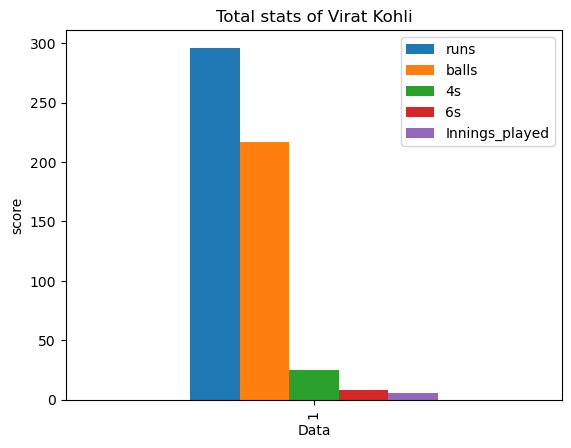

In [36]:
Virat_score.plot(kind='bar')
plt.title('Total stats of Virat Kohli')
plt.xlabel('Data')
plt.ylabel('score')
plt.show()

**Bowling Summary**

In [37]:
bowling = pd.read_csv(r'C:\Users\LENOVO\Desktop\t20_csv_files\fact_bowling_summary.csv')
bowling.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823


**Top Wicket taker bowler in the tournament**

In [38]:
bowling.groupby('bowlerName').agg({'wickets':sum}).sort_values('wickets',ascending=False).head()

,wickets
bowlerName,
Wanindu Hasaranga de Silva,15
Bas de Leede,13
Sam Curran,13
Blessing Muzarabani,12
Paul van Meekeren,11


**Most Expensive bowler's**

In [15]:
bowling.groupby('bowlerName').agg({'runs':'sum','overs':'sum'}).\
eval('economy = runs/overs').round(1).sort_values('runs',ascending = False).head(10)

,runs,overs,economy
bowlerName,,,
Barry McCarthy,227,25.0,9.1
Mark Adair,212,24.0,8.8
Maheesh Theekshana,202,30.1,6.7
Blessing Muzarabani,199,26.0,7.7
Wanindu Hasaranga de Silva,199,31.0,6.4
Paul van Meekeren,198,31.0,6.4
Richard Ngarava,197,28.0,7.0
Fred Klaassen,191,30.0,6.4
Josh Little,189,27.0,7.0


In [39]:
bowling[bowling.bowlingTeam == "India"].head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
181,Pakistan Vs India,India,Bhuvneshwar Kumar,4.0,0,22,1,5.50,17,1,1,3,0,T20I # 1842
182,Pakistan Vs India,India,Arshdeep Singh,4.0,0,32,3,8.00,10,3,1,1,0,T20I # 1842
183,Pakistan Vs India,India,Mohammed Shami,4.0,0,25,1,6.25,14,4,0,1,0,T20I # 1842
184,Pakistan Vs India,India,Hardik Pandya,4.0,0,30,3,7.50,10,4,0,0,0,T20I # 1842
185,Pakistan Vs India,India,Ravichandran Ashwin,3.0,0,23,0,7.66,5,0,1,1,0,T20I # 1842


**Matches played by Indian bowler's**

In [49]:
bowling[bowling.bowlingTeam == "India"].bowlerName.value_counts()

Bhuvneshwar Kumar      6
Arshdeep Singh         6
Mohammed Shami         6
Hardik Pandya          6
Ravichandran Ashwin    6
Axar Patel             5
Name: bowlerName, dtype: int64

**Top wicket taker bowler for India**

In [50]:
bowling[bowling.bowlingTeam == 'India'].groupby('bowlerName').agg({'wickets':sum}).head(1)

,wickets
bowlerName,
Arshdeep Singh,10


**Statistics of Indian bowler's**

In [59]:
bowling[bowling.bowlingTeam == 'India'].groupby('bowlerName').\
agg({'runs':'sum','overs':'sum','wickets':'sum'}).\
eval('economy = runs/overs').round(1).sort_values('runs',ascending = False)

,runs,overs,wickets,economy
bowlerName,,,,
Arshdeep Singh,156,20.0,10,7.8
Ravichandran Ashwin,155,19.0,6,8.2
Hardik Pandya,146,18.0,8,8.1
Mohammed Shami,143,20.0,6,7.2
Axar Patel,115,13.2,3,8.7
Bhuvneshwar Kumar,115,18.4,4,6.3


In [17]:
bowling[bowling.bowlingTeam == "India"].groupby('bowlerName').agg({'0s':sum,'wides':sum,'noBalls':sum,'6s':sum}).\
sort_values('0s',ascending = False)

,0s,wides,noBalls,6s
bowlerName,,,,
Bhuvneshwar Kumar,69,5,0,5
Mohammed Shami,60,1,0,5
Arshdeep Singh,55,6,1,2
Hardik Pandya,42,3,1,5
Ravichandran Ashwin,41,5,0,8
Axar Patel,29,0,0,6
